# **Goal of the project**

In this project, we will use Python and data visualization skills to gain insights into Emissions around the world and in Canada.

# **Get Familiar with Data**

The dataset contains several columns, and here I will introduce you to them for better business understanding:

*   `Country`: The name of the country (String)
ISO 3166-1 alpha-3: The three-letter code for the country. (String)
*   `Year`: The year of the data. (Integer)
*   `Total`: The total amount of CO2 emissions for the country in the given year. (Float)
*   `Coal`: The amount of CO2 emissions from coal for the country in the given year. (Float)
*   `Oil`: The amount of CO2 emissions from oil for the country in the given year. (Float)
*   `Gas`: The amount of CO2 emissions from gas for the country in the given year. (Float)
*   `Cement`: The amount of CO2 emissions from cement production for the country in the given year. (Float)
*   `Flaring`: The amount of CO2 emissions from flaring operations for the country in the given year. (Float)
*   `Other`: The amount of CO2 emissions from other sources for the country in the given year. (Float)
*   `Per Capita`: The amount of CO2 emissions per capita for the country in the given year. (Float)

# **Load Libraries**

In [ ]:
#Working with tabular data
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# **1-Load Data**

In first step, we load the dataset. Now, we can take a look at the first three rows to make sure all columns have been loaded:

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Environment/data.csv')
df.head(3)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For our project, we don't need the column `ISO 3166-1 alpha-3`. So we can remove it.

In [25]:
df = df.drop(
    ['ISO 3166-1 alpha-3'],
    axis = 1)

df.head(3)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2-Check Missing Values**

In [26]:
df.isna().any()

,0
Country,False
Year,False
Total,True
Coal,True
Oil,True
Gas,True
Cement,True
Flaring,True
Other,True
Per Capita,True


The analysis indicates that there are no missing values in the Country and Year columns. For the other columns, it is reasonable to have missing values because the dataset assumes that if a country does not have any emissions for a specific emission source, the value is represented as NaN. We can convert these NaN values to 0.

In [27]:
df.fillna(0,
          inplace = True)

# **3-Handle inconsistent rows**

We need to exclude rows that contain information for all countries rather than a specific country.

In [28]:
transport_data = df[
    (df['Country'] == 'International Transport') |
    (df['Country'] == 'Global')
    ]

transport_data['Country'].unique()

array(['International Transport', 'Global'], dtype=object)

In [29]:
df = df[ ~df['Country'].isin(transport_data['Country']) ]

# **4-First Question**

`Show Top-10 countries in total emission over the time.`

For answering this question, we would like to use a bar chart. X-axis shows name of  coutnry and y-axis shows their total.

### **X-Axis**

First of all, we should make a list showing all countries sorted by total emission.

In [31]:
#Step 1: Group countries based on sum of all columns
df.groupby('Country').sum()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Afghanistan,512856,217.993073,57.676473,131.577257,20.266629,2.516676,5.956043,0.0,10.906441
Albania,512856,293.838988,66.781780,185.838389,16.707287,24.375176,0.136357,0.0,103.493067
Algeria,512856,4862.566823,117.541470,1653.701878,2154.349422,243.216837,693.757211,0.0,170.061697
Andorra,512856,15.484492,0.000000,15.484492,0.000000,0.000000,0.000000,0.0,222.465912
Angola,512856,657.115491,1.600747,346.826407,46.112038,26.090758,236.485539,0.0,39.175331
...,...,...,...,...,...,...,...,...,...
Viet Nam,512856,4623.865636,2266.975955,1408.498211,310.350739,620.706079,17.334650,0.0,56.590739
Wallis and Futuna Islands,512856,0.773031,0.000000,0.773031,0.000000,0.000000,0.000000,0.0,57.823454
Yemen,512856,651.596748,4.977337,595.083134,13.635112,23.039070,14.862096,0.0,42.646845


In [32]:
#Step 2: Sort the above table only based on Total column and not country name
df.groupby('Country').sum().sort_values(by = 'Total', ascending = False)

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
USA,512856,421906.855203,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
China,512856,249352.817660,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,4899.551490,202.362414
Russia,512856,117547.631435,45571.473160,33219.817986,35054.214393,1659.173890,1486.447360,556.504640,803.008475
Germany,512856,93290.503809,64665.842957,19852.714039,7177.257730,1206.606673,93.573871,294.508547,1311.383670
United Kingdom,512856,78508.720102,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
...,...,...,...,...,...,...,...,...,...
Niue,512856,0.301987,0.000000,0.301987,0.000000,0.000000,0.000000,0.000000,134.408709
Tuvalu,512856,0.286818,0.000000,0.286818,0.000000,0.000000,0.000000,0.000000,28.371579
Puerto Rico,512856,0.208848,0.000000,0.208848,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
#Step 3: Instead of table, we only list the index of the above table which is country
df.groupby('Country').sum().sort_values(by = 'Total', ascending = False).index

Index(['USA', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan', 'India',
       'France', 'Canada', 'Ukraine',
       ...
       'Montserrat', 'Christmas Island', 'Wallis and Futuna Islands',
       'St. Kitts-Nevis-Anguilla', 'Saint Helena', 'Niue', 'Tuvalu',
       'Puerto Rico', 'Leeward Islands', 'Antarctica'],
      dtype='object', name='Country', length=230)

In [34]:
#Step 4: Finally, we change the index list, to a string list.
countries = list(df.groupby('Country').sum().sort_values(by = 'Total', ascending = False).index)

countries

['USA',
 'China',
 'Russia',
 'Germany',
 'United Kingdom',
 'Japan',
 'India',
 'France',
 'Canada',
 'Ukraine',
 'Poland',
 'Italy',
 'South Africa',
 'Mexico',
 'Iran',
 'Australia',
 'South Korea',
 'Saudi Arabia',
 'Brazil',
 'Spain',
 'Indonesia',
 'Kazakhstan',
 'Belgium',
 'Czech Republic',
 'Netherlands',
 'Turkey',
 'Taiwan',
 'Romania',
 'Argentina',
 'Venezuela',
 'Thailand',
 'Egypt',
 'Uzbekistan',
 'Malaysia',
 'Austria',
 'Pakistan',
 'North Korea',
 'United Arab Emirates',
 'Hungary',
 'Sweden',
 'Belarus',
 'Algeria',
 'Iraq',
 'Viet Nam',
 'Greece',
 'Denmark',
 'Nigeria',
 'Slovakia',
 'Bulgaria',
 'Philippines',
 'Colombia',
 'Finland',
 'Switzerland',
 'Kuwait',
 'Chile',
 'Serbia',
 'Norway',
 'Portugal',
 'Azerbaijan',
 'Turkmenistan',
 'Israel',
 'Ireland',
 'Libya',
 'Qatar',
 'Singapore',
 'Peru',
 'New Zealand',
 'Syria',
 'Morocco',
 'Hong Kong',
 'Bangladesh',
 'Estonia',
 'Cuba',
 'Trinidad and Tobago',
 'Lithuania',
 'Oman',
 'Moldova',
 'Ecuador',
 'Cro

### **Y-Axis**

Now, we should find the total values.

In [35]:
#Step 1: Group countries based on sum of all columns
df.groupby('Country').sum()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Afghanistan,512856,217.993073,57.676473,131.577257,20.266629,2.516676,5.956043,0.0,10.906441
Albania,512856,293.838988,66.781780,185.838389,16.707287,24.375176,0.136357,0.0,103.493067
Algeria,512856,4862.566823,117.541470,1653.701878,2154.349422,243.216837,693.757211,0.0,170.061697
Andorra,512856,15.484492,0.000000,15.484492,0.000000,0.000000,0.000000,0.0,222.465912
Angola,512856,657.115491,1.600747,346.826407,46.112038,26.090758,236.485539,0.0,39.175331
...,...,...,...,...,...,...,...,...,...
Viet Nam,512856,4623.865636,2266.975955,1408.498211,310.350739,620.706079,17.334650,0.0,56.590739
Wallis and Futuna Islands,512856,0.773031,0.000000,0.773031,0.000000,0.000000,0.000000,0.0,57.823454
Yemen,512856,651.596748,4.977337,595.083134,13.635112,23.039070,14.862096,0.0,42.646845


In [36]:
#Step 2: Sort the above table only based on Total column and not country name
df.groupby('Country').sum().sort_values(by = 'Total', ascending = False)

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
USA,512856,421906.855203,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
China,512856,249352.817660,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,4899.551490,202.362414
Russia,512856,117547.631435,45571.473160,33219.817986,35054.214393,1659.173890,1486.447360,556.504640,803.008475
Germany,512856,93290.503809,64665.842957,19852.714039,7177.257730,1206.606673,93.573871,294.508547,1311.383670
United Kingdom,512856,78508.720102,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
...,...,...,...,...,...,...,...,...,...
Niue,512856,0.301987,0.000000,0.301987,0.000000,0.000000,0.000000,0.000000,134.408709
Tuvalu,512856,0.286818,0.000000,0.286818,0.000000,0.000000,0.000000,0.000000,28.371579
Puerto Rico,512856,0.208848,0.000000,0.208848,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
#Step 3: We only keep the total column
df.groupby('Country').sum().sort_values(by='Total',ascending=False)['Total']

,Total
Country,
USA,421906.855203
China,249352.817660
Russia,117547.631435
Germany,93290.503809
United Kingdom,78508.720102
...,...
Niue,0.301987
Tuvalu,0.286818
Puerto Rico,0.208848


In [38]:
# Step 4: Now, we make a list of total
values = list(df.groupby('Country').sum().sort_values(by='Total',ascending=False)['Total'])

values

[421906.855203,
 249352.81766,
 117547.631435,
 93290.503809,
 78508.720102,
 66711.083302,
 57105.388563,
 39105.764962,
 34115.395331,
 30784.732638,
 28196.094559,
 25065.176247,
 21465.099969,
 20587.507291,
 19546.581041,
 18968.830828,
 18927.931711,
 16705.824729,
 16672.43786,
 15100.2025,
 14933.863878,
 14219.758512,
 12644.150407,
 12076.99061,
 11879.457647,
 11340.784273,
 9319.122557,
 8647.110864,
 8636.500123,
 7819.967829,
 7783.364408,
 6667.727841,
 6346.993001,
 6301.489421,
 5571.699448,
 5273.938344,
 5172.172606,
 5101.479458,
 5058.6615,
 5026.540331,
 5007.976429,
 4862.566823,
 4777.052425,
 4623.865636,
 4132.680505,
 4115.088231,
 4008.988276,
 3934.30281,
 3873.285019,
 3535.601487,
 3503.5435939999998,
 3226.028836,
 3059.691956,
 3010.456705,
 2996.751975,
 2804.101751,
 2672.221889,
 2656.068305,
 2530.484041,
 2501.110198,
 2428.609351,
 2263.34887,
 2222.006506,
 2155.058694,
 2101.495042,
 1995.778882,
 1916.907678,
 1888.237034,
 1809.2541039999999,


### **Draw Plot**

<ipython-input-39-e87f84c3faf2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = countries[:10], #only keep the first 10 country


<Axes: >

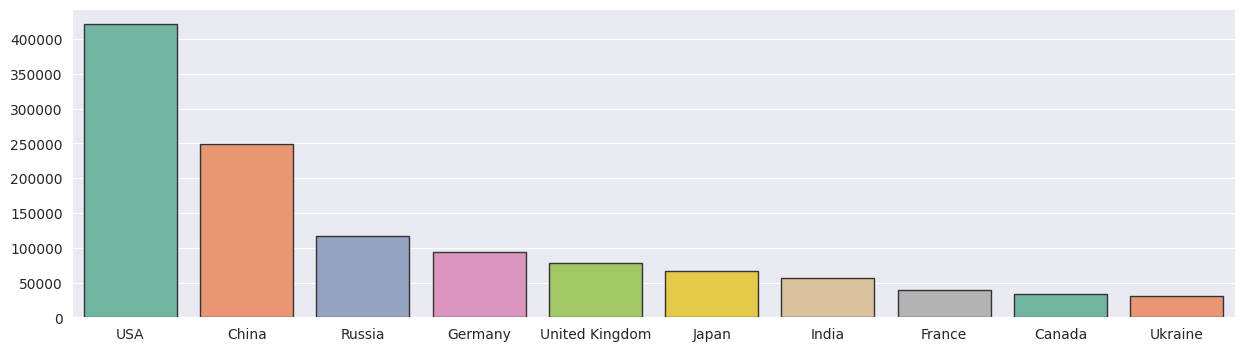

In [39]:
plt.figure(figsize=(15,4))

sns.set_style('darkgrid')

sns.barplot(x = countries[:10], #only keep the first 10 country
            y = values[:10], #only keep the first 10 value
            palette = 'Set2',
            edgecolor = '.2')

# **5-Second Question**

`Analyze the trend of emissions of Canada over the past 10 years`

We draw two plots next to each other. One of them is line chart and the other one is bar chart. X-axis and Y-axis are the same in both plots.

### **Fiter Data**

Step 1: Filter whole data only for the rows which are Canada


In [40]:
Canada_data = df[df['Country'] == 'Canada']
Canada_data.head(2)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
9248,Canada,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9249,Canada,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Keep the last 10 Years**

Just because we only need the last 10 years, first we should sort Canada data based on year to bring all the last years to top.

In [41]:
Canada_data = Canada_data.sort_values( by = 'Year', ascending = False)
Canada_data.head(2)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
9519,Canada,2021,545.634517,43.862080,241.659653,235.381822,6.624708,16.056983,2.049271,14.300468
9518,Canada,2020,534.863824,48.034995,238.378466,223.719402,6.624708,16.056983,2.049271,14.116709


Then we get rid of the rows after 10 and only the first 10 rows which represensts the last 10 years.

In [42]:
Canada_past_10 = Canada_data.iloc[:10 , :]
Canada_past_10

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
9519,Canada,2021,545.634517,43.862080,241.659653,235.381822,6.624708,16.056983,2.049271,14.300468
9518,Canada,2020,534.863824,48.034995,238.378466,223.719402,6.624708,16.056983,2.049271,14.116709
9517,Canada,2019,584.714184,58.325705,269.325970,231.962485,7.125179,15.827711,2.147135,15.582994
9516,Canada,2018,584.369116,60.795568,266.964272,231.980501,6.914762,15.549502,2.164511,15.778726
9515,Canada,2017,571.544619,72.688193,260.403026,214.581205,6.827239,14.834711,2.210246,15.635476
9514,Canada,2016,560.525313,73.497136,256.234514,208.265201,6.114245,14.134506,2.279709,15.521199
9513,Canada,2015,574.298190,78.098819,258.061213,213.496439,6.184772,16.132493,2.324454,16.072321
9512,Canada,2014,569.839687,76.685625,256.683199,211.161562,5.911522,16.888576,2.509203,16.095071
9511,Canada,2013,572.613311,78.970095,263.938583,204.540349,5.973037,16.722913,2.468334,16.330663
9510,Canada,2012,568.223147,81.445934,263.709536,198.172490,6.532305,15.818377,2.544506,16.379141


### **Draw the plots**

Now, we draw two plots. The X-aixs is showing the last 10 years and Y-Axis is total emissions.

<Axes: xlabel='Year', ylabel='Total'>

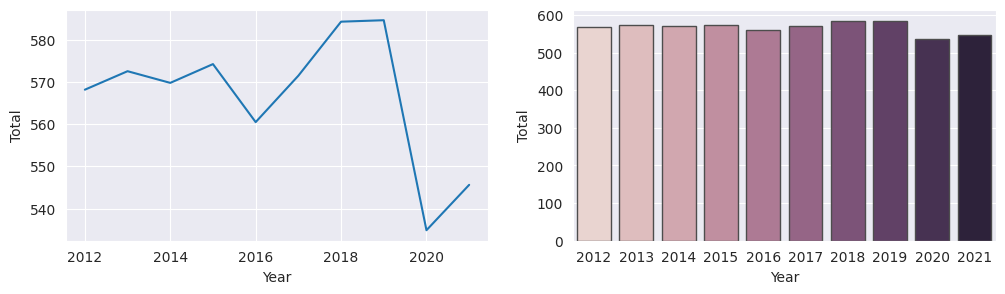

In [43]:
plt.figure(figsize=(12,3))

plt.subplot(121)
sns.lineplot(x = 'Year', y = 'Total', data = Canada_past_10 )

plt.subplot(122)
sns.barplot(x = 'Year',y = 'Total', data = Canada_past_10, hue = 'Year', legend = False, edgecolor = '.3')

# **6-Third Question**

`Analyze the top 5 countries with the most average emissions over the last 5 years`

We draw two plots next to each other. One of them is line chart and the other one is bar chart. X-axis and Y-axis are the same in both plots.

### **Fiter Data**

First we filter entire data only for the last 5 years.

In [44]:
# Get the last 5 years
last_5_years = df['Year'].unique()[-5:]
last_5_years

array([2017, 2018, 2019, 2020, 2021])

In [45]:
# Filter the DataFrame for the last 5 years
df_last_5_years = df[df['Year'].isin(last_5_years)]
df_last_5_years.head(2)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
267,Afghanistan,2017,9.867969,3.447824,6.074912,0.300448,0.044785,0.0,0.0,0.276852
268,Afghanistan,2018,10.818048,3.847200,6.620848,0.293120,0.056880,0.0,0.0,0.294876


### **Find Top-5 based on average total**

In [46]:
# Step 1: Groupdata based on average of columns
df_last_5_years.groupby('Country').mean()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Afghanistan,2019.0,11.064723,3.920680,6.835612,0.265846,0.042585,0.000000,0.0,0.292199
Albania,2019.0,4.968669,0.315110,3.462757,0.146396,1.034552,0.009855,0.0,1.730758
Algeria,2019.0,173.720269,1.082935,55.989704,88.717777,11.374407,16.555446,0.0,4.071328
Andorra,2019.0,0.468345,0.000000,0.468345,0.000000,0.000000,0.000000,0.0,6.138160
Angola,2019.0,22.108011,0.000000,14.072893,2.220086,1.082656,4.732377,0.0,0.686596
...,...,...,...,...,...,...,...,...,...
Viet Nam,2019.0,300.636439,164.663014,66.879782,17.199134,50.477312,1.417197,0.0,3.135147
Wallis and Futuna Islands,2019.0,0.026366,0.000000,0.026366,0.000000,0.000000,0.000000,0.0,2.244810
Yemen,2019.0,11.672674,0.300021,9.142180,0.277944,0.663596,1.288932,0.0,0.369824


In [47]:
# Step 2:Sort data based on average Total
df_last_5_years.groupby('Country').mean().sort_values(by = 'Total', ascending = False)

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
China,2019.0,10706.912541,7516.915468,1566.370829,630.729328,816.599957,3.975617,172.321341,7.538817
USA,2019.0,5113.957130,1103.335566,2264.380937,1608.765509,40.416206,71.156861,25.902051,15.323094
India,2019.0,2563.293882,1661.322865,637.207893,126.977083,135.117143,2.668897,0.000000,1.854506
Russia,2019.0,1685.347819,383.693469,397.468751,812.469477,20.682133,54.372447,16.661543,11.582385
Japan,2019.0,1109.481759,430.176753,416.087098,229.601174,25.243773,0.383511,7.989450,8.823615
...,...,...,...,...,...,...,...,...,...
French Equatorial Africa,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Panama Canal Zone,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Puerto Rico,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
# Step 3: Only keep the top 5
df_last_5_years.groupby('Country').mean().sort_values(by = 'Total', ascending = False)[:5]

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
China,2019.0,10706.912541,7516.915468,1566.370829,630.729328,816.599957,3.975617,172.321341,7.538817
USA,2019.0,5113.957130,1103.335566,2264.380937,1608.765509,40.416206,71.156861,25.902051,15.323094
India,2019.0,2563.293882,1661.322865,637.207893,126.977083,135.117143,2.668897,0.000000,1.854506
Russia,2019.0,1685.347819,383.693469,397.468751,812.469477,20.682133,54.372447,16.661543,11.582385
Japan,2019.0,1109.481759,430.176753,416.087098,229.601174,25.243773,0.383511,7.989450,8.823615


In [49]:
# Step 4: Reset index of table instead of country as the index
avg_emissions = df_last_5_years.groupby('Country').mean().sort_values(by = 'Total', ascending = False)[:5][['Year' , 'Total' , 'Per Capita']].reset_index()
avg_emissions

,Country,Year,Total,Per Capita
0,China,2019.0,10706.912541,7.538817
1,USA,2019.0,5113.957130,15.323094
2,India,2019.0,2563.293882,1.854506
3,Russia,2019.0,1685.347819,11.582385
4,Japan,2019.0,1109.481759,8.823615


### **Draw Plot**

<Axes: xlabel='Total', ylabel='Per Capita'>

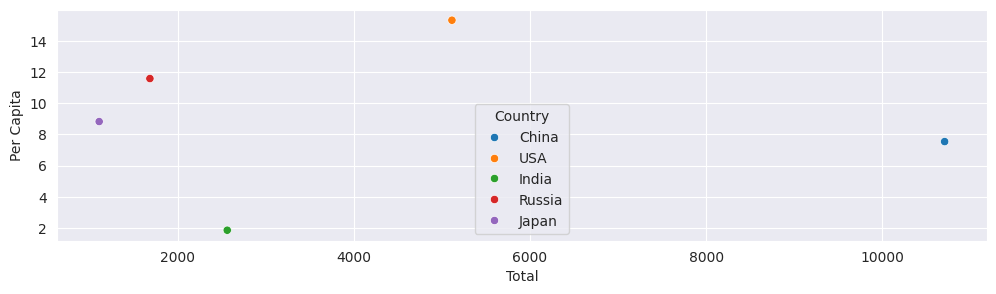

In [50]:
plt.figure(figsize=(12,3))

sns.scatterplot(x = 'Total',
                y = 'Per Capita',
                data = avg_emissions,
                hue = 'Country')